# Machine Learning Online Class - Exercise 1: Linear Regression

In [1]:
%matplotlib inline

from numpy import eye, loadtxt, hstack, zeros, ones, dot, transpose, array, linspace, logspace, meshgrid
from matplotlib import cm
from matplotlib.pyplot import plot, ylabel, xlabel, figure, subplots, contour
from mpl_toolkits.mplot3d import Axes3D

## Part 1: Basic Function

### Warm up exercise

print 5x5 identity matrix:

In [2]:
print(eye(5))

[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]


# Part 2: Plotting

In [3]:
# load the data

data = loadtxt('ex1data1.txt', delimiter=',')
X, y = data[:, 0].reshape(-1, 1), data[:, 1].reshape(-1, 1)

Text(0.5,0,'Population of City in 10,000s')

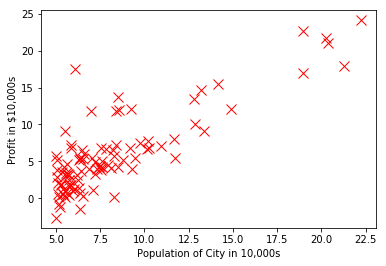

In [4]:
# implement your code to plot the data

fig, ax = subplots()

ax.plot(X, y, 'rx', markersize=10)
ax.set_ylabel('Profit in $10,000s')
ax.set_xlabel('Population of City in 10,000s')

## Part 3: Gradient descent

In [5]:
m = y.size
X = hstack((ones((m, 1)), X)) # add a column of ones to X
theta = zeros((2, 1))

iterations = 1500
alpha = 0.01

### Compute Cost

In [6]:
def h(theta, X):
    """hypotheses of theta"""
    return dot(X, theta)

def computeCost(X, y, theta):
    m = y.size
    J = 0

    temp = h(theta, X) - y
    J = (dot(transpose(temp), temp) ) / (2 * m)

    return J[0, 0]

def gradientDescent(X, y, theta, alpha, iterations):
    m = y.size
    J_history = zeros((iterations, 1))

    for i in range(iterations):
        theta = theta - alpha / m * dot(transpose(X), (h(theta, X) - y))
        J_history[i, 0] = computeCost(X, y, theta)

    return theta, J_history

In [7]:
# compute and display initial cost
J = computeCost(X, y, theta)

print(f'J = {J:.2f}')

J = 32.07


In [8]:
# run gradient descent
theta, _ = gradientDescent(X, y, theta, alpha, iterations)
print(f'Theta found by gradient descent: {str(theta[0, 0])} {str(theta[1, 0])}')

Theta found by gradient descent: -3.63029143940436 1.166362350335582


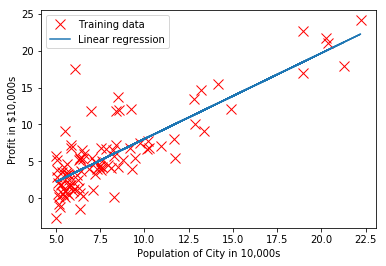

In [9]:
ax.plot(X[:,1], dot(X, theta), '-') # plot on the previous canvas
ax.legend(['Training data', 'Linear regression'])
fig # re-draw the canvas at here

In [10]:
# Predict values for population sizes of 35,000 and 70,000
predict1 = dot(array([1, 3.5]), theta)[0]
print(f'For population = 35,000, we predict a profit of {predict1*10000:.2f}')
predict2 = dot(array([1, 7]), theta)[0]
print(f'For population = 70,000, we predict a profit of {predict2*10000:.2f}')

For population = 35,000, we predict a profit of 4519.77
For population = 70,000, we predict a profit of 45342.45


# Part 4: Visualizing J(theta_0, theta_1)

Text(0.5,0,'theta1')

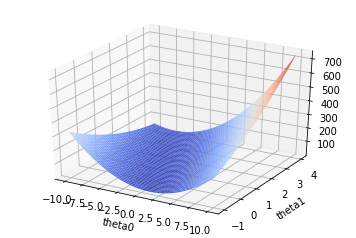

In [11]:
theta0_space = linspace(-10, 10, 100)
theta1_space = linspace(-1, 4, 100)

# initialize J_vals to a matrix of 0's
J_vals = zeros((theta0_space.size, theta1_space.size))
# Fill out J_vals
for i in range(theta0_space.size):
    for j in range(theta1_space.size):
        t = array([[theta0_space[i]], [theta1_space[j]]])
        J_vals[i, j] = computeCost(X, y, t)

fig = figure()
ax = fig.add_subplot(1, 1, 1, projection='3d')
theta0_grid, theta1_grid = meshgrid(theta0_space, theta1_space)
ax.plot_surface(theta0_grid, theta1_grid, J_vals, cmap=cm.coolwarm)
xlabel('theta0')
ylabel('theta1')

Text(0,0.5,'theta1')

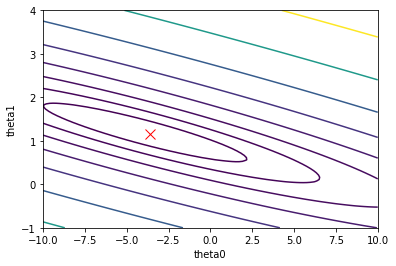

In [12]:
# Contour plot
# Plot J_vals as 15 contours spaced logarithmically between 0.01 and 100
contour(theta0_space, theta1_space,
        transpose(J_vals), # perform transpose only to match with the course
        logspace(-2, 3, 20))
plot(theta[0], theta[1], 'rx', markersize=10, linewidth=2)
xlabel('theta0')
ylabel('theta1')